In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression, SelectFromModel, VarianceThreshold
from methods import pre


## Reducing memory usage by using indices

In [2]:
from classes import drug
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression, SelectFromModel, VarianceThreshold

In [3]:
%%time
gdsc_ge = pd.read_csv('data/Processed/gdsc_cell_ge.csv').fillna(0).set_index('CCL')
ctrp_ge = pd.read_csv('data/Processed/ctrp_cell_ge.csv').fillna(0).set_index('CCL')
gdsc_dr = pd.read_csv('data/Processed/gdsc_poz_dr.csv').fillna(0)
ctrp_dr = pd.read_csv('data/Processed/ctrp_poz_dr.csv').fillna(0)

CPU times: user 46 s, sys: 784 ms, total: 46.7 s
Wall time: 49.7 s


In [3]:
%%time
aag = drug('17-AAG', {'ctrp': ctrp_ge, 'gdsc': gdsc_ge}, {'ctrp': ctrp_dr, 'gdsc': gdsc_dr})

CPU times: user 839 ms, sys: 88.7 ms, total: 928 ms
Wall time: 947 ms


In [4]:
aag.pre()

In [5]:
'ge' in aag.__dict__

False

In [6]:
aag.combine()

In [7]:
aag.split()

In [8]:
aag.get('X', 'train').shape

(827, 20600)

In [9]:

aag.fs(f_regression, n=0.1)

In [10]:
aag.get('X', 'train').shape

(827, 2060)

In [ ]:
aag.X['fs_test']

## Speeding up combine

In [14]:
gdsc_dr = pd.read_csv('data/Processed/gdsc_poz_dr.csv').fillna(0)
gdsc_ge = pd.read_csv('data/Processed/gdsc_cell_ge.csv').fillna(0).set_index('CCL')

In [15]:
dr = gdsc_dr
ge = gdsc_ge

In [35]:
ge.join(dr[dr['Drug_name'] == '17-AAG'][['CCL', 'AUC_IC50']].set_index('CCL'), how='right')

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A3GALT2P,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,AUC_IC50
CCL,,,,,,,,,,,,,,,,,,,,,
22RV1,3.537942,6.364651,5.332441,2.923030,2.815383,2.815383,3.241125,3.262633,4.722157,4.942126,...,7.526319,9.274166,3.785757,5.201929,2.742575,4.635015,3.940190,4.658663,8.088672,0.169156
2313287,3.370950,6.284884,3.485675,2.831562,2.913369,2.913369,3.313028,3.096527,4.873621,4.213177,...,6.526713,8.021952,3.520584,4.957371,2.636933,4.350120,4.395806,4.598583,7.951146,0.577314
5637,2.927335,2.892365,3.181651,2.926549,2.677943,2.677943,4.295357,3.205598,5.249042,4.495021,...,7.057572,9.261486,3.492602,4.813163,2.558705,4.580977,4.810975,4.371501,7.974367,0.828724
639V,3.953010,2.858072,2.892599,2.828334,2.729762,2.729762,2.960059,3.121154,4.445200,4.017422,...,6.310088,8.021780,3.919468,5.923131,2.782005,4.969272,5.481422,5.205446,8.118109,0.726141
647V,2.804009,2.944390,3.178071,2.675572,2.949402,2.949402,3.029297,3.024326,4.636786,4.724453,...,8.657911,9.426794,3.657576,6.082990,3.148358,5.182059,5.203430,4.806941,8.530606,0.008665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAPC,3.043994,3.055992,3.532297,2.946112,2.835091,2.835091,3.273226,3.182387,4.474313,4.238488,...,8.619045,10.392332,3.704526,5.128979,3.082707,4.061633,3.664478,4.276836,7.238275,0.502122
YH13,5.167861,3.072842,3.049070,3.098071,3.029716,3.029716,2.990092,3.318574,4.561866,3.581945,...,8.048126,8.235304,3.305898,4.745612,2.577626,5.215836,7.003537,4.203823,7.919283,0.881166
YKG1,4.711624,3.067945,3.306930,3.037960,2.713442,2.713442,3.154398,2.988924,4.586814,3.781220,...,7.978261,9.150385,3.972405,5.166082,2.813449,5.117194,5.085635,4.918170,8.208343,0.803193


In [28]:
dr[dr['Drug_name'] == '17-AAG'][['CCL', 'AUC_IC50']].set_index('CCL')

,AUC_IC50
CCL,
22RV1,0.169156
2313287,0.577314
5637,0.828724
639V,0.726141
647V,0.008665
...,...
YAPC,0.502122
YH13,0.881166
YKG1,0.803193


In [16]:
%%time
drug_dr = dr[dr['Drug_name'] == '17-AAG'][['CCL', 'AUC_IC50']]

CPU times: user 7.94 ms, sys: 1.2 ms, total: 9.14 ms
Wall time: 15.4 ms


In [17]:
%%time
X = np.array([list(ge.loc[i].values) for i in drug_dr[drug_dr['CCL'].isin(ge.index)]['CCL']])

CPU times: user 2.9 s, sys: 258 ms, total: 3.16 s
Wall time: 3.33 s


In [18]:
%%time
X = X.reshape(drug_dr.shape[0], ge.shape[1])

CPU times: user 31 µs, sys: 1 µs, total: 32 µs
Wall time: 35 µs


In [19]:
%%time
data = pd.DataFrame(X).assign(DR = drug_dr['AUC_IC50'])

CPU times: user 48.3 ms, sys: 9.44 ms, total: 57.7 ms
Wall time: 66.9 ms


In [66]:
data

,0,1,2,3,4,5,6,7,8,9,...,19553,19554,19555,19556,19557,19558,19559,19560,19561,DR
0,3.537942,6.364651,5.332441,2.923030,2.815383,2.815383,3.241125,3.262633,4.722157,4.942126,...,7.526319,9.274166,3.785757,5.201929,2.742575,4.635015,3.940190,4.658663,8.088672,0.169156
1,3.370950,6.284884,3.485675,2.831562,2.913369,2.913369,3.313028,3.096527,4.873621,4.213177,...,6.526713,8.021952,3.520584,4.957371,2.636933,4.350120,4.395806,4.598583,7.951146,0.577314
2,2.927335,2.892365,3.181651,2.926549,2.677943,2.677943,4.295357,3.205598,5.249042,4.495021,...,7.057572,9.261486,3.492602,4.813163,2.558705,4.580977,4.810975,4.371501,7.974367,0.828724
3,3.953010,2.858072,2.892599,2.828334,2.729762,2.729762,2.960059,3.121154,4.445200,4.017422,...,6.310088,8.021780,3.919468,5.923131,2.782005,4.969272,5.481422,5.205446,8.118109,0.726141
4,2.804009,2.944390,3.178071,2.675572,2.949402,2.949402,3.029297,3.024326,4.636786,4.724453,...,8.657911,9.426794,3.657576,6.082990,3.148358,5.182059,5.203430,4.806941,8.530606,0.008665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,3.043994,3.055992,3.532297,2.946112,2.835091,2.835091,3.273226,3.182387,4.474313,4.238488,...,8.619045,10.392332,3.704526,5.128979,3.082707,4.061633,3.664478,4.276836,7.238275,0.502122
656,5.167861,3.072842,3.049070,3.098071,3.029716,3.029716,2.990092,3.318574,4.561866,3.581945,...,8.048126,8.235304,3.305898,4.745612,2.577626,5.215836,7.003537,4.203823,7.919283,0.881166
657,4.711624,3.067945,3.306930,3.037960,2.713442,2.713442,3.154398,2.988924,4.586814,3.781220,...,7.978261,9.150385,3.972405,5.166082,2.813449,5.117194,5.085635,4.918170,8.208343,0.803193
658,3.143593,3.779792,5.095163,2.879333,2.749091,2.749091,3.186225,3.359589,4.511721,4.241912,...,8.196766,9.205680,3.515323,5.152341,2.472749,5.046783,6.016707,5.168183,7.063949,0.513477


## Speeding up pre-processing

In [2]:
gdsc_ge = pd.read_csv('data/Processed/gdsc_cell_ge.csv').fillna(0).set_index('CCL')

In [3]:
print(type(gdsc_ge.keys()))

<class 'pandas.core.indexes.base.Index'>


In [5]:
gdsc_ge.shape

(706, 19562)

In [6]:
gdsc_ge.shape[0]

706

In [8]:
%%time
under = (gdsc_ge.to_numpy()>5).T.astype(np.int8)

n = [np.count_nonzero(i) > 0.1*gdsc_ge.shape[0] for i in under]
names = {gdsc_ge.keys()[k]:v for k, v in enumerate(n)}
indices = [k for k,v in names.items() if v]
index = gdsc_ge[indices]

CPU times: user 117 ms, sys: 6.79 ms, total: 124 ms
Wall time: 125 ms


In [9]:
%%time
index2 = pre(gdsc_ge,t=5, p=0.1)

CPU times: user 6.17 s, sys: 127 ms, total: 6.3 s
Wall time: 6.36 s


In [10]:
index.shape

(706, 9919)

In [11]:
index2.shape

(706, 9919)

## Domain Adaptation experiments

In [113]:
X_a = np.random.rand(3, 2) * 3

In [114]:
X_b = np.random.rand(3, 2) * 4

In [115]:
X_c = np.random.rand(3, 2) * 5

In [116]:
def jump(domain, n, data):
    result = []
    for i, ele in enumerate(data):
        result.append(ele)
        for j in range(0, domain):
            result.append(0)
        result.append(ele)
        for j in range(0, n-domain-1):
            result.append(0)
    return result
    

In [117]:
def feda(domains):
    n = len(domains)
    
    samples = 0
    for i in domains:
        samples += i.shape[0]
    
    features = domains[0].shape[1]*(n+1)
    
    new = np.zeros(features)
    for i, data in enumerate(domains):
        for j in data:
            new = np.vstack([new, jump(i, n, j)])
            
    return new[1:]

In [118]:
feda([X_a, X_b, X_c])

array([[2.39552445, 2.39552445, 0.        , 0.        , 0.8923882 ,
        0.8923882 , 0.        , 0.        ],
       [2.09713092, 2.09713092, 0.        , 0.        , 1.99024727,
        1.99024727, 0.        , 0.        ],
       [2.17421497, 2.17421497, 0.        , 0.        , 2.66618415,
        2.66618415, 0.        , 0.        ],
       [3.77029806, 0.        , 3.77029806, 0.        , 0.52768015,
        0.        , 0.52768015, 0.        ],
       [3.03560501, 0.        , 3.03560501, 0.        , 1.3673342 ,
        0.        , 1.3673342 , 0.        ],
       [2.41889914, 0.        , 2.41889914, 0.        , 3.77142649,
        0.        , 3.77142649, 0.        ],
       [0.70066211, 0.        , 0.        , 0.70066211, 3.89969596,
        0.        , 0.        , 3.89969596],
       [1.67451535, 0.        , 0.        , 1.67451535, 0.97901028,
        0.        , 0.        , 0.97901028],
       [0.52645206, 0.        , 0.        , 0.52645206, 1.13973433,
        0.        , 0.      

## Mess

In [1]:
from methods import fs

In [2]:
fs.__doc__

' Returns a subset of {X_train} and {X_test} with features being selected by the method {model}\n    :param int n: it can be the variance thereshold or the number of chosen features \n    :\n    '

In [1]:
from classes import drug
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression, SelectFromModel, VarianceThreshold

In [2]:
%%time
gdsc_ge = pd.read_csv('data/Processed/gdsc_cell_ge.csv').fillna(0).set_index('CCL')
ctrp_ge = pd.read_csv('data/Processed/ctrp_cell_ge.csv').fillna(0).set_index('CCL')
gdsc_dr = pd.read_csv('data/Processed/gdsc_poz_dr.csv').fillna(0)
ctrp_dr = pd.read_csv('data/Processed/ctrp_poz_dr.csv').fillna(0)

CPU times: user 23 s, sys: 948 ms, total: 23.9 s
Wall time: 24.7 s


In [5]:
for i in ctrp_dr[:1]:
    print(i)

Database
Drug_name
CCL
Concentrations_nM
Responses
Minimal_tested_concentration_nM
Maximal_tested_concentration_nM
EC50_minimum_asymptote
EC50_maximum_asymptote
EC50_slope
EC50_calculated_nM
EC50_nM
EC50_residuals
EC50_residual_standard_error
EC50_quality
AUC_EC50
IC50_minimum_asymptote
IC50_maximum_asymptote
IC50_slope
IC50_calculated_nM
IC50_nM
IC50_residuals
IC50_residual_standard_error
IC50_quality
AUC_IC50


In [6]:
%%time
aag = drug('17-AAG', {'ctrp': ctrp_ge, 'gdsc': gdsc_ge}, {'ctrp': ctrp_dr, 'gdsc': gdsc_dr})

CPU times: user 982 ms, sys: 111 ms, total: 1.09 s
Wall time: 1.15 s


In [7]:
aag.to_json()

col
<class 'list'>
da
<class 'dict'>
data
<class 'pandas.core.frame.DataFrame'>
dr
<class 'pandas.core.frame.DataFrame'>
ge
<class 'pandas.core.frame.DataFrame'>
name
<class 'str'>
predicted
<class 'list'>


In [8]:
%%time
aag.pre()

CPU times: user 515 ms, sys: 310 ms, total: 825 ms
Wall time: 921 ms


In [9]:
%%time
aag.combine()

CPU times: user 455 ms, sys: 364 ms, total: 819 ms
Wall time: 847 ms


In [10]:
%%time
aag.split()

CPU times: user 158 ms, sys: 122 ms, total: 280 ms
Wall time: 303 ms


In [11]:
%%time
aag.fs(f_regression, n=0.01)

CPU times: user 336 ms, sys: 173 ms, total: 509 ms
Wall time: 460 ms


In [12]:
%%time
aag.feda()

CPU times: user 939 ms, sys: 677 ms, total: 1.62 s
Wall time: 1.72 s


In [13]:
%%time
aag.train(DecisionTreeRegressor())

CPU times: user 247 ms, sys: 45.9 ms, total: 292 ms
Wall time: 304 ms


In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

aag.metrics([r2_score, mean_absolute_error, mean_squared_error, median_absolute_error])

ValueError: If using all scalar values, you must pass an index

In [16]:
aag.scores

AttributeError: 'drug' object has no attribute 'scores'

In [ ]:
aag.to_json()

## Runs

In [3]:
from runs import run
from sklearn.svm import SVR
from classes import tuning

In [4]:

ge = {'ctrp': ctrp_ge, 'gdsc': gdsc_ge}
dr = {'ctrp': ctrp_dr, 'gdsc': gdsc_dr}
t2 = {
    'degree': [2, 3, 4, 5],
    'epsilon' : [0.1, 0.2, 0.3, 0.9],
    'C':[0.01, 0.1, 1, 10, 100],
    'gamma':['scale']
}
tuning = tuning(t2, iterations=50, cv=3, scoring='r2')

In [39]:
import numpy as np

In [5]:
str(list(dr.keys()))

"['ctrp', 'gdsc']"

In [6]:
same = []
for i in gdsc_dr['Drug_name'].unique():
    if i in ctrp_dr['Drug_name'].unique():
        same.append(i)
        
print(len(same))

61


In [7]:
len({})

0

In [8]:
%%time
r1, scores = run(same[:3], ge, dr, f_regression, True, SVR(), n = 0.01, tuning = None)

/Users/admin/Desktop/Thesis/Code/phc-data-pipeline/venv/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'r2_score': -0.1343614705435281, 'mean_absolute_error': 0.25238042594171767, 'mean_squared_error': 0.09315469581361, 'median_absolute_error': 0.23628684000644368}


/Users/admin/Desktop/Thesis/Code/phc-data-pipeline/venv/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'r2_score': -0.17717951014941247, 'mean_absolute_error': 0.3310736105645157, 'mean_squared_error': 0.159818708512096, 'median_absolute_error': 0.22879229534129933}


/Users/admin/Desktop/Thesis/Code/phc-data-pipeline/venv/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'r2_score': -0.14824531322013734, 'mean_absolute_error': 0.23353054390841446, 'mean_squared_error': 0.08786357835987874, 'median_absolute_error': 0.19027069385257778}
CPU times: user 11.1 s, sys: 3.93 s, total: 15.1 s
Wall time: 14.8 s


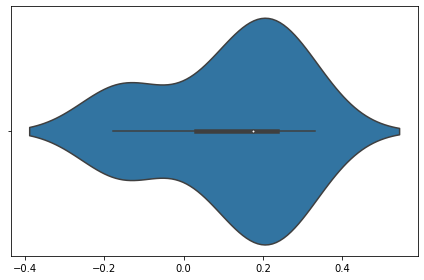

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(pd.DataFrame.from_dict(scores, orient='index'))
plt.tight_layout()